# Dataset1: Q1) Linear regression, Ridge Regression, XGBoost, Random Forest Regressor, Arima with performance matrix(Mean squared error, Mean absolute error and R2 value)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot
%matplotlib inline
import seaborn as sns

# Scikit-Learn 
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn import metrics
from sklearn.linear_model import Ridge 
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
import xgboost as xgb
from xgboost import XGBRegressor
from pandas.plotting import autocorrelation_plot


# For metrics performance
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.stattools import adfuller
import statsmodels.tsa.api as ap
import statsmodels.api as am

This is the dataset created by merging all the stores. We created a new dataset so that we can use it throughout.

In [ ]:
df=pd.read_excel('/content/drive/MyDrive/CECS_551/output.xlsx')

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])
df['Day'] = df['Date'].dt.weekday
df['Month'] = df['Date'].dt.month
df['Year']  = df['Date'].dt.year
df.drop('Date',axis=1,inplace=True)
df.fillna(0,inplace=True)
df

,Unnamed: 0,Store,Dept,Weekly_Sales,IsHoliday,Type,Size,Temperature,gas_price,discount_promotional,discount_clearance,discount_damaged_good,discount_competitive,CPI,Unemployment,Day,Month,Year
0,0,1,1,24924.50,False,A,151315,59.33,3.360,9667.50,268.29,0.60,8368.15,223.659114,6.833,4,2,2010
1,1,1,1,46039.49,True,A,151315,51.65,3.409,8687.47,1594.87,2.20,2144.87,223.753643,6.833,4,2,2010
2,2,1,1,41595.55,False,A,151315,52.39,3.510,2706.87,3128.74,1.88,2396.68,223.917015,6.833,4,2,2010
3,3,1,1,19403.54,False,A,151315,60.12,3.555,6129.28,1802.84,0.00,301.48,224.132020,6.833,4,2,2010
4,4,1,1,21827.90,False,A,151315,61.65,3.630,3552.58,601.32,0.00,2666.22,224.347025,6.833,4,3,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,421565,45,98,508.37,False,B,118221,0.00,0.000,0.00,0.00,0.00,0.00,0.000000,0.000,4,9,2012
421566,421566,45,98,628.10,False,B,118221,0.00,0.000,0.00,0.00,0.00,0.00,0.000000,0.000,4,10,2012
421567,421567,45,98,1061.02,False,B,118221,0.00,0.000,0.00,0.00,0.00,0.00,0.000000,0.000,4,10,2012
421568,421568,45,98,760.01,False,B,118221,0.00,0.000,0.00,0.00,0.00,0.00,0.000000,0.000,4,10,2012


## Pre processing where we converted all big values to small values

In [ ]:
cols =['Temperature','gas_price','CPI','Unemployment','Size','Weekly_Sales','IsHoliday','discount_promotional','discount_clearance','discount_damaged_good','discount_competitive']
df_numeric = df[cols]
from sklearn.preprocessing import PowerTransformer

pt = PowerTransformer(standardize=True)
df_transformed = pd.DataFrame(pt.fit_transform(df_numeric),columns=cols)

pd.DataFrame({'cols':cols, 'box-cox lamda': pt.lambdas_})

for col in cols:
    df[col] = df_transformed[col]
    
    
df.head()

,Unnamed: 0,Store,Dept,Weekly_Sales,IsHoliday,Type,Size,Temperature,gas_price,discount_promotional,discount_clearance,discount_damaged_good,discount_competitive,CPI,Unemployment,Day,Month,Year
0,0,1,1,0.633019,-0.275106,A,0.22807,0.434446,0.383330,1.566556,0.233706,-0.189748,1.670924,1.016905,0.081022,4,2,2010
1,1,1,1,1.440158,3.634961,A,0.22807,0.203730,0.440705,1.561992,0.856296,-0.038212,1.623742,1.017845,0.081022,4,2,2010
2,2,1,1,1.283860,-0.275106,A,0.22807,0.226273,0.561469,1.500941,1.271129,-0.062360,1.628612,1.019471,0.081022,4,2,2010
3,3,1,1,0.384527,-0.275106,A,0.22807,0.457793,0.616363,1.545995,0.922074,-0.283214,1.490745,1.021609,0.081022,4,2,2010
4,4,1,1,0.496418,-0.275106,A,0.22807,0.502821,0.709349,1.517219,0.451048,-0.283214,1.633091,1.023747,0.081022,4,3,2010


## Remove Outliers

In [ ]:
Q1 = df['Unemployment'].quantile(0.25)
Q3 = df['Unemployment'].quantile(0.75)
IQR = Q3-Q1

df = df[df['Unemployment'] >= Q1-1.5*(IQR)]
df = df[df['Unemployment'] <= Q3+1.5*(IQR)]
df.shape

(323714, 18)

In [ ]:
Q1 = df['Temperature'].quantile(0.25)
Q3 = df['Temperature'].quantile(0.75)
IQR = Q3-Q1

df = df[df['Temperature'] >= Q1-1.5*(IQR)]

df = df[df['Temperature'] <= Q3+1.5*(IQR)]
df.shape

(323027, 18)

Convert string type to Int 

In [ ]:
tp = {'A':1, 'B':2, 'C':0}
df['Type'] = df['Type'].map(tp)
yr = {2010:1, 2011:2, 2012:0}
df['Year'] = df['Year'].map(yr)
df.head()

,Unnamed: 0,Store,Dept,Weekly_Sales,IsHoliday,Type,Size,Temperature,gas_price,discount_promotional,discount_clearance,discount_damaged_good,discount_competitive,CPI,Unemployment,Day,Month,Year
0,0,1,1,0.633019,-0.275106,1,0.22807,0.434446,0.383330,1.566556,0.233706,-0.189748,1.670924,1.016905,0.081022,4,2,1
1,1,1,1,1.440158,3.634961,1,0.22807,0.203730,0.440705,1.561992,0.856296,-0.038212,1.623742,1.017845,0.081022,4,2,1
2,2,1,1,1.283860,-0.275106,1,0.22807,0.226273,0.561469,1.500941,1.271129,-0.062360,1.628612,1.019471,0.081022,4,2,1
3,3,1,1,0.384527,-0.275106,1,0.22807,0.457793,0.616363,1.545995,0.922074,-0.283214,1.490745,1.021609,0.081022,4,2,1
4,4,1,1,0.496418,-0.275106,1,0.22807,0.502821,0.709349,1.517219,0.451048,-0.283214,1.633091,1.023747,0.081022,4,3,1


## Modeling

## Linear Regression


Splitting stores: Store1_10 and Store11_35

In [ ]:
store1_10=df.loc[df['Store']<=10]
store11_35=df.loc[(df['Store'] >= 11) & (df['Store'] <= 35)]
print(store1_10.shape)
print(store11_35.shape)

(96508, 18)
(226519, 18)


Stores1_10



In [ ]:
X = store1_10.drop(['Weekly_Sales','Type'],axis=1)
Y = store1_10['Weekly_Sales']
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

transformer = ColumnTransformer(transformers=[('tf',OneHotEncoder(sparse=False,drop='first'),['Store'])],remainder='passthrough')
X_train= transformer.fit_transform(X_train)
X_test = transformer.transform(X_test)
c = LinearRegression()
c.fit(X_train,Y_train)
y_pred = c.predict(X_test)
# print(model)
print(f'MSE: {mean_squared_error(Y_test,y_pred)}')
print(f'MAE: {mean_absolute_error(Y_test,y_pred)}')
print(f'R2 : {r2_score(Y_test,y_pred)}')

MSE: 0.7880411373245544
MAE: 0.6246598472526079
R2 : 0.2508821045622597


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


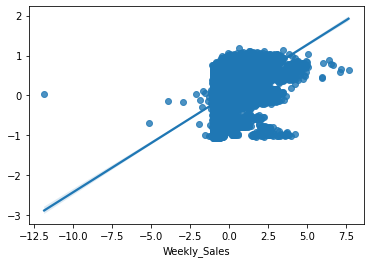

In [ ]:
sns.regplot(Y_test,y_pred)

Store11_35

In [ ]:
X = store11_35.drop(['Weekly_Sales','Type'],axis=1)
Y = store11_35['Weekly_Sales']
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

transformer = ColumnTransformer(transformers=[('tf',OneHotEncoder(sparse=False,drop='first'),['Store'])],remainder='passthrough')
X_train= transformer.fit_transform(X_train)
X_test = transformer.transform(X_test)
c = LinearRegression()
c.fit(X_train,Y_train)
y_pred = c.predict(X_test)
# print(model)
print(f'MSE: {mean_squared_error(Y_test,y_pred)}')
print(f'MAE: {mean_absolute_error(Y_test,y_pred)}')
print(f'R2 : {r2_score(Y_test,y_pred)}')

MSE: 0.7393404224768703
MAE: 0.6253634598854412
R2 : 0.19675135094369778


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


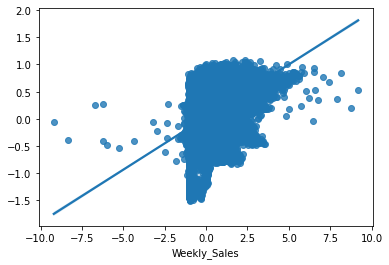

In [ ]:
sns.regplot(Y_test,y_pred)

Observation:


*   R2 value should be between 0 to 1 (0.25 and 0.18 in our case) and value closer to 0 states that it doesnot explain any variations.
*   It can be seen from the graph that the predicted values(scatter plot) are far from actual value(line plot). In such case we cant rely on this model.

## Ridge Regression

Store1_10

In [ ]:
X = store1_10.drop(['Weekly_Sales','Type'],axis=1)
Y = store1_10['Weekly_Sales']
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

transformer = ColumnTransformer(transformers=[('tf',OneHotEncoder(sparse=False,drop='first'),['Store'])],remainder='passthrough')
X_train= transformer.fit_transform(X_train)
X_test = transformer.transform(X_test)
c = Ridge()
c.fit(X_train,Y_train)
y_pred = c.predict(X_test)
# print(model)
print(f'MSE: {mean_squared_error(Y_test,y_pred)}')
print(f'MAE: {mean_absolute_error(Y_test,y_pred)}')
print(f'R2 : {r2_score(Y_test,y_pred)}')

MSE: 0.8161764441536359
MAE: 0.6495531298298004
R2 : 0.22413646801991738


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


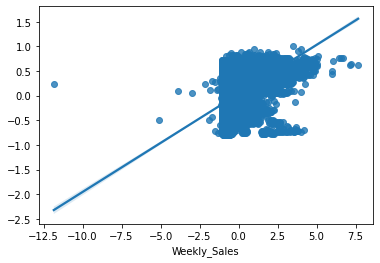

In [ ]:
sns.regplot(Y_test,y_pred)

Store11_35

In [ ]:
X = store11_35.drop(['Weekly_Sales','Type'],axis=1)
Y = store11_35['Weekly_Sales']
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

transformer = ColumnTransformer(transformers=[('tf',OneHotEncoder(sparse=False,drop='first'),['Store'])],remainder='passthrough')
X_train= transformer.fit_transform(X_train)
X_test = transformer.transform(X_test)
c = Ridge()
c.fit(X_train,Y_train)
y_pred = c.predict(X_test)
# print(model)
print(f'MSE: {mean_squared_error(Y_test,y_pred)}')
print(f'MAE: {mean_absolute_error(Y_test,y_pred)}')
print(f'R2 : {r2_score(Y_test,y_pred)}')

MSE: 0.79236680686
MAE: 0.6698936019286715
R2 : 0.1391413916810934


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


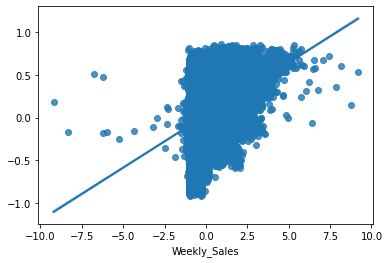

In [ ]:
sns.regplot(Y_test,y_pred)

Observation:


*   R2 value should be between 0 to 1 (0.22 and 0.12 in our case) and value closer to 0 states that it doesnot explain any variations.
*   It can be seen from the graph that the predicted values(scatter plot) are far from actual value(line plot). In such case we cant rely on this model.

## Random Forest Classifier

In [ ]:
X = store1_10.drop(['Weekly_Sales','Type'],axis=1)
Y = store1_10['Weekly_Sales']
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

transformer = ColumnTransformer(transformers=[('tf',OneHotEncoder(sparse=False,drop='first'),['Store'])],remainder='passthrough')
X_train= transformer.fit_transform(X_train)
X_test = transformer.transform(X_test)
c = RandomForestRegressor()
c.fit(X_train,Y_train)
y_pred = c.predict(X_test)
# print(model)
print(f'MSE: {mean_squared_error(Y_test,y_pred)}')
print(f'MAE: {mean_absolute_error(Y_test,y_pred)}')
print(f'R2 : {r2_score(Y_test,y_pred)}')

MSE: 0.03528361481900656
MAE: 0.08192329053644175
R2 : 0.9664591275445508


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


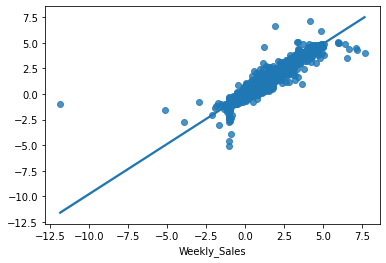

In [ ]:
sns.regplot(Y_test,y_pred)

Store11_35

In [ ]:
X = store11_35.drop(['Weekly_Sales','Type'],axis=1)
Y = store11_35['Weekly_Sales']
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

transformer = ColumnTransformer(transformers=[('tf',OneHotEncoder(sparse=False,drop='first'),['Store'])],remainder='passthrough')
X_train= transformer.fit_transform(X_train)
X_test = transformer.transform(X_test)
c = RandomForestRegressor()
c.fit(X_train,Y_train)
y_pred = c.predict(X_test)
# print(model)
print(f'MSE: {mean_squared_error(Y_test,y_pred)}')
print(f'MAE: {mean_absolute_error(Y_test,y_pred)}')
print(f'R2 : {r2_score(Y_test,y_pred)}')

MSE: 0.03543457281792551
MAE: 0.08072807896945104
R2 : 0.9615024799394405


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


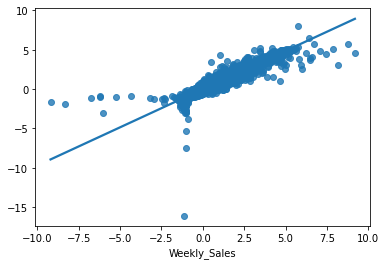

In [ ]:
sns.regplot(Y_test,y_pred)

Observation: 


*   As we can see from R2 value which is close to 1 (0.96 and 0.96 in our case) it explains all the variation
*   It can be seen from the graph that the predicted values(scatter plot) are clumped around actual value(line) which shows that actual and predicted values are close to ine another. In such case we can rely on this model.



## XGBoost

Store1_10

In [ ]:
X = store1_10.drop(['Weekly_Sales','Type'],axis=1)
Y = store1_10['Weekly_Sales']
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

transformer = ColumnTransformer(transformers=[('tf',OneHotEncoder(sparse=False,drop='first'),['Store'])],remainder='passthrough')
X_train= transformer.fit_transform(X_train)
X_test = transformer.transform(X_test)
c = XGBRegressor()
c.fit(X_train,Y_train)
y_pred = c.predict(X_test)
# print(model)
print(f'MSE: {mean_squared_error(Y_test,y_pred)}')
print(f'MAE: {mean_absolute_error(Y_test,y_pred)}')
print(f'R2 : {r2_score(Y_test,y_pred)}')

[04:36:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
MSE: 0.20008958647788302
MAE: 0.31092388119724873
R2 : 0.8097933181125454


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


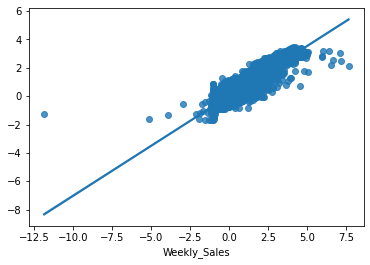

In [ ]:
sns.regplot(Y_test,y_pred)

Store11_35

In [ ]:
X = store11_35.drop(['Weekly_Sales','Type'],axis=1)
Y = store11_35['Weekly_Sales']
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

transformer = ColumnTransformer(transformers=[('tf',OneHotEncoder(sparse=False,drop='first'),['Store'])],remainder='passthrough')
X_train= transformer.fit_transform(X_train)
X_test = transformer.transform(X_test)
c = XGBRegressor()
c.fit(X_train,Y_train)
y_pred = c.predict(X_test)
# print(model)
print(f'MSE: {mean_squared_error(Y_test,y_pred)}')
print(f'MAE: {mean_absolute_error(Y_test,y_pred)}')
print(f'R2 : {r2_score(Y_test,y_pred)}')

[04:37:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
MSE: 0.2276660170837622
MAE: 0.3426508749719278
R2 : 0.7526546431129537


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


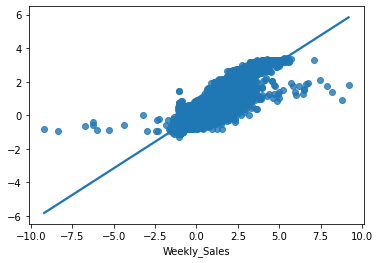

In [ ]:
sns.regplot(Y_test,y_pred)

Observation: 


*   As we can see from R2 value which is close to 1 (0.81 and 0.75 in our case) it explains all the variation
*   It can be seen from the graph that the predicted values(scatter plot) are clumped around actual value(line) which shows that actual and predicted values are close to ine another. In such case we can rely on this model.



## **Arima Model**

In [ ]:
from statsmodels.tsa.stattools import adfuller
def ad_test(dataset):
     dftest = adfuller(dataset, autolag = 'AIC')
     print("1. ADF : ",dftest[0])
     print("2. P-Value : ", dftest[1])
     print("3. Num Of Lags : ", dftest[2])
     print("4. Num Of Observations Used For ADF Regression:",      dftest[3])
     print("5. Critical Values :")
     for key, val in dftest[4].items():
         print("\t",key, ": ", val)


In [ ]:
def isSeriesStationary(series):
    pValue = adfuller(series)[1]
    if pValue > 0.05:
        return False
    else:
        return True
def isSeriesStationaryAvg(series, delta = 2):
    split = int(len(series)/2)
    split1, split2 = series[:split], series[split:]
    avg1, avg2 = split1.mean(), split2.mean()
    var1, var2 = split1.var(), split2.var()
    if abs(avg1 - avg2) > delta or abs(var1 - var2) > delta**2:
        return False
    else:
        return True

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
def difference(dataset, interval=1):
    diff = list()
    for i in range(interval, len(dataset)):
        value = dataset[i] - dataset[i - interval]
        diff.append(value)
    return np.array(diff)

def inverse_difference(history, yhat, interval=1):
    return yhat + history[-interval]

def describeSeries(data, label):
    fig = matplotlib.pyplot.gcf()
    fig.set_size_inches(18.5, 10.5)
    plt.plot(data, label = "Series")
    plt.plot(pd.rolling_mean(data, window = 2), '--', label = "Rolling mean")
    plt.plot(pd.rolling_std(data, 2), ":", label = "Rolling Std")
    plt.legend()
    plt.savefig(label)
    plt.clf()

In [ ]:
def splitTrainTest(series, testSplit):
    totalData = len(series)
    trainSplit = int(totalData * (1 - testSplit))
    trainSet = series[:trainSplit]
    testSet = series[trainSplit:]
    return trainSet, testSet

Dataset of Stores 1 to 10

In [ ]:
ad_test(store1_10['Weekly_Sales'])

1. ADF :  -14.74187333715586
2. P-Value :  2.563295044567325e-27
3. Num Of Lags :  64
4. Num Of Observations Used For ADF Regression: 96443
5. Critical Values :
	 1% :  -3.430417806622145
	 5% :  -2.861569969452484
	 10% :  -2.5667859516929794


If p< 0.05 ; Data is stationary

if p>0.05; Data is not stationary

Larger p value could indicate presence of certain trends(varying mean) or seasonality as well.

In [ ]:
isSeriesStationaryAvg(store1_10["Weekly_Sales"].values)

True

Checking whether there is stationary values present or not

In [ ]:
isSeriesStationary(store1_10["Weekly_Sales"].values)

True

Figuring out the stationarity of the dataset

In [ ]:
trainSet, testSet = splitTrainTest(store1_10["Weekly_Sales"].values, 0.1)

Splitting the dataset in to training and testing part.

In [ ]:
import statsmodels.api as sm
differencedTrainSet = difference(trainSet, 365)
model = sm.tsa.arima.ARIMA(differencedTrainSet, order=(7,0,1))
"""Fit model with non constant trend and no displacement"""
model_fit = model.fit()
forecast = model_fit.predict(len(differencedTrainSet), len(differencedTrainSet) + len(testSet))

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


In [ ]:
yPrediction = []
history = list(trainSet)
for f in forecast:
    yPredict = inverse_difference(history, f, 365)
    yPrediction.append(yPredict)
    history.append(yPredict)

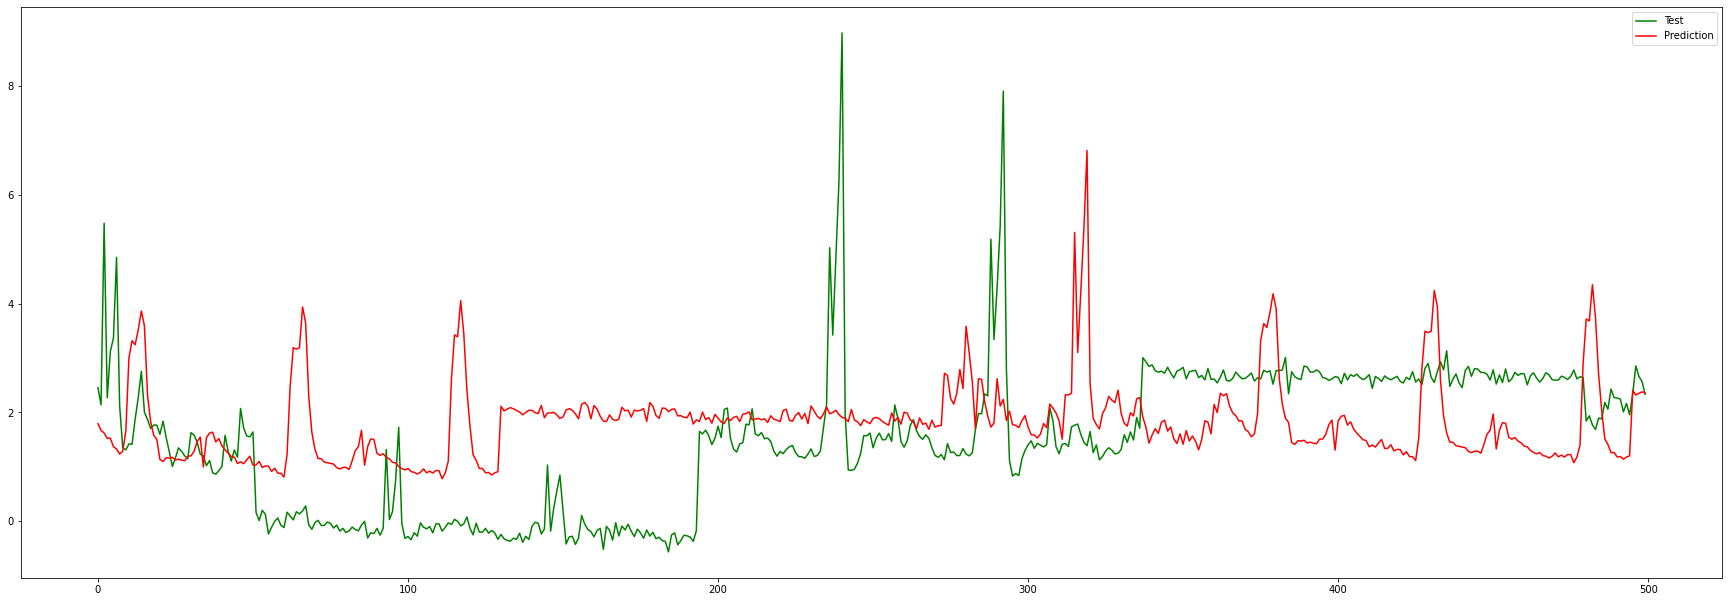

In [ ]:
import matplotlib
import matplotlib.pyplot as plt

fig = matplotlib.pyplot.gcf()
fig.set_size_inches(30.5, 10.5)
plt.plot(testSet[:500], color='green', label = "Test")
plt.plot(yPrediction[:500], color='red', label = "Prediction")
plt.gca().get_lines()[0].get_xydata()
plt.legend()

In [ ]:
print(f'MSE: {mean_squared_error(testSet, yPrediction[:-1])}')
print(f'MAE: {mean_absolute_error(testSet, yPrediction[:-1])}')
print(f'R2 : {r2_score(testSet, yPrediction[:-1])}')

MSE: 30.633598385018153
MAE: 4.902795855140299
R2 : -20.788963944926333


Dataset of Stores 11 to 35

In [ ]:
ad_test(store11_35['Weekly_Sales'])

1. ADF :  -23.046542733740555
2. P-Value :  0.0
3. Num Of Lags :  74
4. Num Of Observations Used For ADF Regression: 226444
5. Critical Values :
	 1% :  -3.4303788785489138
	 5% :  -2.861552763944722
	 10% :  -2.5667767937874477


In [ ]:
isSeriesStationaryAvg(store11_35["Weekly_Sales"].values)

True

In [ ]:
isSeriesStationary(store11_35["Weekly_Sales"].values)

True

In [ ]:
trainSet, testSet = splitTrainTest(store11_35["Weekly_Sales"].values, 0.1)

In [ ]:
differencedTrainSet = difference(trainSet, 365)
model = sm.tsa.arima.ARIMA(differencedTrainSet, order=(7,0,1))
"""Fit model with non constant trend and no displacement"""
model_fit = model.fit()
forecast = model_fit.predict(len(differencedTrainSet), len(differencedTrainSet) + len(testSet))

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


In [ ]:
yPrediction = []
history = list(trainSet)
for f in forecast:
    yPredict = inverse_difference(history, f, 365)
    yPrediction.append(yPredict)
    history.append(yPredict)

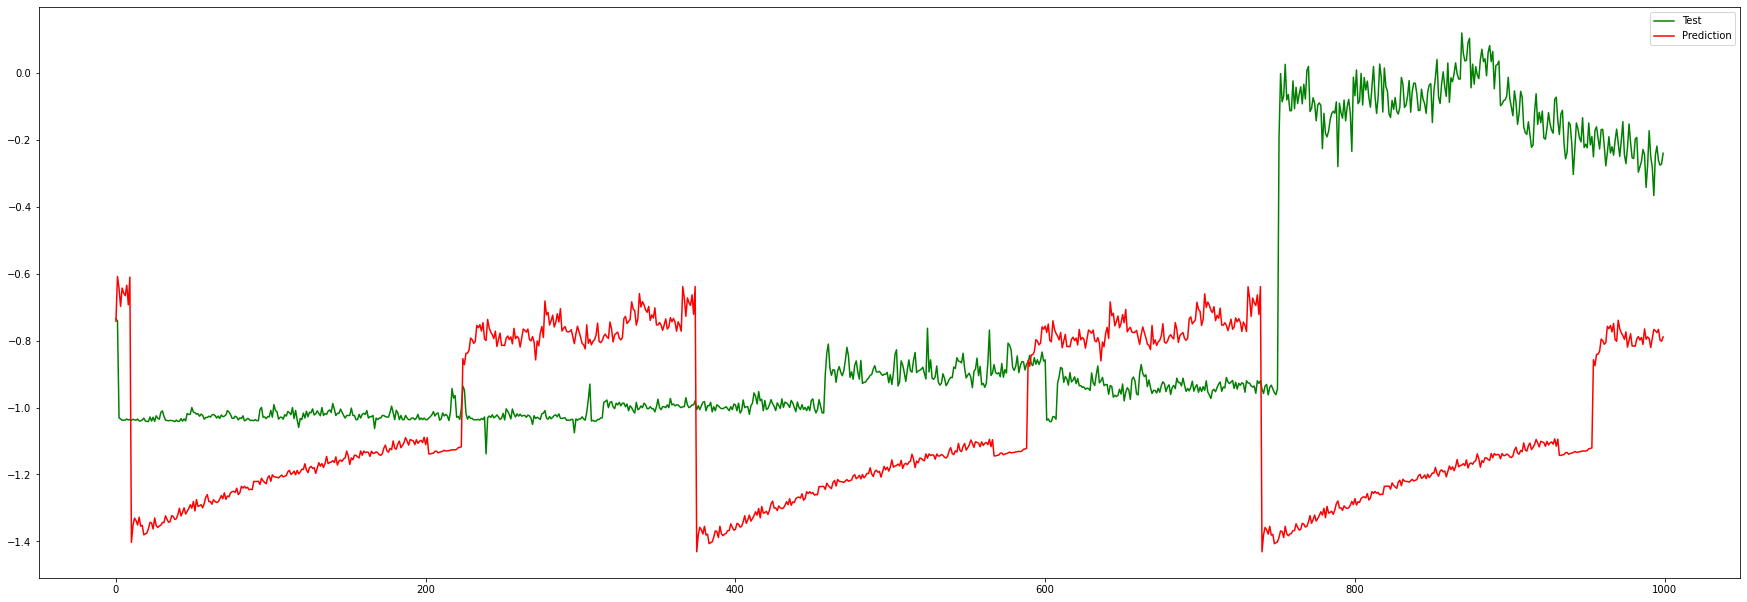

In [ ]:
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(30.5, 10.5)
plt.plot(testSet[:1000], color='green', label = "Test")
plt.plot(yPrediction[:1000], color='red', label = "Prediction")
plt.gca().get_lines()[0].get_xydata()
plt.legend()

In [ ]:
print(f'MSE: {mean_squared_error(testSet, yPrediction[:-1])}')
print(f'MAE: {mean_absolute_error(testSet, yPrediction[:-1])}')
print(f'R2 : {r2_score(testSet, yPrediction[:-1])}')

MSE: 1.8384723934543519
MAE: 0.9341963836686561
R2 : -0.8047079119326921


## **Ensemble Models**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# importing utility modules
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss
from sklearn.preprocessing import LabelEncoder
# importing machine learning models for prediction
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV

# importing voting classifier
from sklearn.ensemble import VotingClassifier

In [ ]:
# loading the combined stores, columns and features set in dataframe data after pre-processing
data_set = pd.read_excel('/content/drive/MyDrive/CECS_551/output.xlsx')


In [ ]:
data_ = data_set

In [ ]:
#Counting total number of store types.
totalCount = data_.Type.value_counts().sum()
#Counting total number of stores with type C.
cCount = data_.Type.value_counts().C
print("Percentage of C type Stores", (cCount/totalCount)*100)

Percentage of C type Stores 10.104371753208245


In [ ]:
data = data_.dropna()
data = data.sample(frac=0.1)
y = data.pop('Type')
data_ = data.drop('Date',axis=1)

In [ ]:
X = data_
X_ = X.to_numpy().astype('float32')

In [ ]:
le = LabelEncoder()
transformed = le.fit_transform(y.to_numpy().reshape(-1, 1))


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(X_)
X__ = data_scaled

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn import metrics  
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score

import warnings

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

from sklearn.metrics import log_loss
from sklearn.preprocessing import LabelEncoder
# importing machine learning models for prediction
from sklearn.ensemble import ExtraTreesClassifier
from lightgbm import LGBMClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, confusion_matrix


In [ ]:
model_params = {
    
    'ada_boost': {
        'model': AdaBoostClassifier(),
        'params': {
             'learning_rate': [0.2],
            'n_estimators': [100]
         }
    },
        'XGB_classifier' : {
        'model': XGBClassifier(),
        'params' : {
            'learning_rate': [0.1],
            'n_estimators': [1500]
         }
    },

         'LGBM_classifier' : {
        'model': LGBMClassifier(),
        'params' : {
            'learning_rate': [0.3],
            'n_estimators': [100],
            'max-depth' : [4]
         }
    }
}


In [ ]:
#Splitting data into test and train
X_train, X_test, y_train, y_test = train_test_split(X__, transformed, test_size=0.20)

In [ ]:
scores = []
for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'],mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    
df_temp = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df_temp

,model,best_score,best_params
0,ada_boost,0.998907,"{'learning_rate': 0.2, 'n_estimators': 100}"
1,XGB_classifier,0.999972,"{'learning_rate': 0.1, 'n_estimators': 1500}"
2,LGBM_classifier,1.000000,"{'learning_rate': 0.3, 'max-depth': 4, 'n_esti..."


In [ ]:
#Default Random Forest model without any tuning - base metric
RF_model_default = RandomForestClassifier()
RF_model_default.fit(X_train[ :100], y_train[:100])
y_pred_RF_default =RF_model_default.predict(X_test)
print('Accuracy Score - Random Forest - Default:', metrics.accuracy_score(y_test, y_pred_RF_default))  

estimator_RF = RandomForestClassifier()
parameters_RF = {
    'n_estimators': (50,150,1),                #The number of trees in the forest
    'criterion': ('gini', 'entropy'),            #The function to measure the quality of a split
    'max_depth': (10,160,1),                     #The maximum depth of the tree
    'min_samples_split': (0.000001, 0.00001, 0.0001),   #The minimum number of samples required to split an internal node
                }
# with GridSearch
grid_search_RF = GridSearchCV(
    estimator=estimator_RF,
    param_grid=parameters_RF,
    scoring = 'accuracy',
    n_jobs = -1,
    cv = 5
)

RF_1=grid_search_RF.fit(X_train[:1500], y_train[:1500])
y_pred_RF1 =RF_1.predict(X_test)


print(grid_search_RF.best_params_ ) 
print(grid_search_RF.best_score_ )

Accuracy Score - Random Forest - Default: 0.9971044115142225
{'criterion': 'gini', 'max_depth': 10, 'min_samples_split': 1e-06, 'n_estimators': 50}
0.998


In [ ]:
print(confusion_matrix(y_test,y_pred_RF1))
print(classification_report(y_test,y_pred_RF1))

[[10456     0     0]
 [    0  7126     0]
 [    0     0    31]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     10456
           1       1.00      1.00      1.00      7126
           2       1.00      1.00      1.00        31

    accuracy                           1.00     17613
   macro avg       1.00      1.00      1.00     17613
weighted avg       1.00      1.00      1.00     17613



In [ ]:
#Default Bagging model without any tuning - base metric
Bag_model_default = BaggingClassifier()
Bag_model_default.fit(X_train[:100], y_train[:100])
y_pred_Bag_default =Bag_model_default.predict(X_test)
print('Accuracy Score - Bagging - Default:', metrics.accuracy_score(y_test, y_pred_Bag_default)) 

#Parameter tuning with GridSearchCV 
#################################
### Bagging
#################################
estimator_Bag = BaggingClassifier()
parameters_Bag = {
    'n_estimators': (200,500,1),                                               
    'max_features': (0.1,0.7, 0.01) 
                }
# with GridSearch
grid_search_Bag= GridSearchCV(
    estimator=estimator_Bag,
    param_grid=parameters_Bag,
    scoring = 'accuracy',
    n_jobs = -1,
    cv = 5
)

Bag_1=grid_search_Bag.fit(X_train[:1500], y_train[:1500])
y_pred_Bag1 =Bag_1.predict(X_test)

print(grid_search_Bag.best_params_ ) 
print(grid_search_Bag.best_score_ ) 

Accuracy Score - Bagging - Default: 0.9971044115142225
{'max_features': 0.7, 'n_estimators': 200}
0.998


In [ ]:
print(confusion_matrix(y_test,y_pred_Bag1))
print(classification_report(y_test,y_pred_Bag1))

[[10456     0     0]
 [    0  7126     0]
 [    0     0    31]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     10456
           1       1.00      1.00      1.00      7126
           2       1.00      1.00      1.00        31

    accuracy                           1.00     17613
   macro avg       1.00      1.00      1.00     17613
weighted avg       1.00      1.00      1.00     17613



## **CNN**

In [ ]:
import pandas as pd
from numpy import mean
from numpy import std
from sklearn.datasets import make_multilabel_classification
from sklearn.model_selection import RepeatedKFold
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder

In [ ]:
data_ = pd.read_excel('/content/drive/MyDrive/CECS_551/output.xlsx')
data = data_.dropna()

In [ ]:
def get_model(n_inputs, n_outputs):
    model = Sequential()
    model.add(Dense(20, input_dim=n_inputs, kernel_initializer='he_uniform', activation='relu'))
    model.add(Dense(n_outputs, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam')
    return model

In [ ]:
def evaluate_model(X, y):
    results = list()
    n_inputs, n_outputs = X.shape[1], y.shape[1]
    # define evaluation procedure
    cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
    # enumerate folds
    for train_ix, test_ix in cv.split(X):
        # prepare data
        X_train, X_test = X[train_ix], X[test_ix]
        y_train, y_test = y[train_ix], y[test_ix]
        # define model
        model = get_model(n_inputs, n_outputs)
        # fit model
        model.fit(X_train, y_train, verbose=0, epochs=100)
        # make a prediction on the test set
        yhat = model.predict(X_test)
        # round probabilities to class labels
        yhat = yhat.round()
        # calculate accuracy
        acc = accuracy_score(y_test, yhat)
        # store result
        print('>%.3f' % acc)
        results.append(acc)
    return results

In [ ]:
cnn_data = data
cnn_data

,Unnamed: 0,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,gas_price,discount_promotional,discount_clearance,discount_damaged_good,discount_competitive,CPI,Unemployment
0,0,1,1,2010-02-05,24924.50,False,A,151315,59.33,3.360,9667.50,268.29,0.60,8368.15,223.659114,6.833
1,1,1,1,2010-02-12,46039.49,True,A,151315,51.65,3.409,8687.47,1594.87,2.20,2144.87,223.753643,6.833
2,2,1,1,2010-02-19,41595.55,False,A,151315,52.39,3.510,2706.87,3128.74,1.88,2396.68,223.917015,6.833
5,5,1,1,2010-03-12,21043.39,False,A,151315,60.71,3.669,8368.50,298.46,1.39,1340.29,224.562029,6.833
6,6,1,1,2010-03-19,22136.64,False,A,151315,64.00,3.734,2588.06,80.89,3.20,909.76,224.716695,6.833
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
340268,340268,35,98,2012-06-22,21.52,False,B,103681,73.23,3.564,5984.00,32.80,0.57,528.54,142.160646,8.876
340270,340270,35,98,2012-07-06,14.70,False,B,103681,82.08,3.475,7808.90,7.00,47.50,6948.28,142.223430,8.839
340281,340281,35,98,2012-09-21,44.96,False,B,103681,66.10,4.038,6982.10,87.37,6.00,2085.94,142.679817,8.839
340282,340282,35,98,2012-09-28,68.48,False,B,103681,64.92,3.997,20867.96,42.64,3.22,5895.05,142.765750,8.839


In [ ]:
cnn_data = cnn_data.head(60000)
cnn_data

,Unnamed: 0,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,gas_price,discount_promotional,discount_clearance,discount_damaged_good,discount_competitive,CPI,Unemployment
0,0,1,1,2010-02-05,24924.50,False,A,151315,59.33,3.360,9667.50,268.29,0.60,8368.15,223.659114,6.833
1,1,1,1,2010-02-12,46039.49,True,A,151315,51.65,3.409,8687.47,1594.87,2.20,2144.87,223.753643,6.833
2,2,1,1,2010-02-19,41595.55,False,A,151315,52.39,3.510,2706.87,3128.74,1.88,2396.68,223.917015,6.833
5,5,1,1,2010-03-12,21043.39,False,A,151315,60.71,3.669,8368.50,298.46,1.39,1340.29,224.562029,6.833
6,6,1,1,2010-03-19,22136.64,False,A,151315,64.00,3.734,2588.06,80.89,3.20,909.76,224.716695,6.833
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
223253,223253,23,52,2012-04-20,1762.75,False,B,114533,56.55,4.046,2438.53,6551.03,30.84,502.31,137.923067,4.125
223254,223254,23,52,2012-04-27,2345.98,False,B,114533,44.62,4.023,2622.72,1325.48,27.04,2.00,137.978133,4.125
223259,223259,23,52,2012-06-01,2876.94,False,B,114533,66.22,3.798,4238.85,92.20,61.64,1401.23,138.113807,4.125
223260,223260,23,52,2012-06-08,2285.47,False,B,114533,56.82,3.746,7565.40,503.40,220.02,2581.42,138.117419,4.125


In [ ]:
cnn_data = cnn_data.sample(frac=1).reset_index(drop=True)

In [ ]:
cnn_data = cnn_data.head(2000)
cnn_data

,Unnamed: 0,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,gas_price,discount_promotional,discount_clearance,discount_damaged_good,discount_competitive,CPI,Unemployment
0,40070,5,2,2012-09-21,12396.17,False,B,34875,71.09,3.721,3033.26,5.73,1.10,83.82,223.373759,5.603
1,191675,20,32,2012-07-13,11977.82,False,A,203742,78.27,3.523,8679.19,99.70,22.34,4960.49,214.728027,7.280
2,167038,17,96,2012-06-08,894.83,False,B,93188,60.51,3.776,6233.58,140.20,328.34,763.88,130.889677,6.235
3,7467,1,67,2012-02-17,21228.22,False,A,151315,45.32,3.510,9873.33,11062.27,9.80,8409.31,220.425759,8.099
4,22583,3,16,2011-12-30,2113.08,True,B,37392,48.29,3.129,1449.16,14356.07,66.66,81.43,223.009084,7.197
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,74860,8,49,2011-11-18,1336.37,False,A,155078,51.72,3.308,6839.45,114.32,166.32,868.79,221.691174,6.123
1996,3082,1,23,2012-03-09,21179.12,False,A,151315,58.76,3.669,10331.04,151.88,6.00,671.43,221.059189,8.163
1997,105372,11,72,2012-02-03,91359.15,False,A,207499,60.24,3.360,50909.18,1957.49,137.23,37091.67,223.659114,6.833
1998,33039,4,26,2012-03-02,19089.00,False,A,205863,50.38,3.619,18564.88,1394.86,32.93,10714.60,130.645793,4.607


In [ ]:
y = cnn_data.pop('Type')
data_ = cnn_data.drop('Date',axis=1)
X = data_

In [ ]:
X_ = X.to_numpy().astype('float32')

In [ ]:
jobs_encoder = OneHotEncoder()
transformed = jobs_encoder.fit_transform(y.to_numpy().reshape(-1, 1))
transformed_ = transformed.toarray()

In [ ]:
results = evaluate_model(X_, transformed_)
# summarize performance
print('Accuracy: %.3f (%.3f)' % (mean(results), std(results)))

7/7 [==============================] - 0s 2ms/step
>0.915
7/7 [==============================] - 0s 2ms/step
>0.755
7/7 [==============================] - 0s 4ms/step
>0.895
7/7 [==============================] - 0s 3ms/step
>0.805
7/7 [==============================] - 0s 2ms/step
>0.830
7/7 [==============================] - 0s 2ms/step
>0.880
7/7 [==============================] - 0s 2ms/step
>0.765
7/7 [==============================] - 0s 2ms/step
>0.775
7/7 [==============================] - 0s 2ms/step
>0.805
7/7 [==============================] - 0s 3ms/step
>0.950
7/7 [==============================] - 0s 3ms/step
>0.860
7/7 [==============================] - 0s 2ms/step
>0.900
7/7 [==============================] - 0s 3ms/step
>0.900
7/7 [==============================] - 0s 3ms/step
>0.855
7/7 [==============================] - 0s 2ms/step
>0.835
7/7 [==============================] - 0s 2ms/step
>0.840
7/7 [==============================] - 0s 2ms/step
>0.895
7/7 [=========

We got the Accuracy as 0.851